In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

# mpl.rcParams['figure.figsize'] = (15, 7)
# mpl.rcParams['axes.grid'] = False

C:\Users\Jayanti\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Jayanti\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\Jayanti\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
mpl.rcParams['figure.figsize'] = (20, 7)
mpl.rcParams['axes.grid'] = False

Sunspots:
Sunspots are regions on the Sun's photosphere that appear darker than the surrounding areas on the visible solar disk 

In [3]:
df = pd.read_csv("Sunspots.csv")
df.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [4]:
df.tail()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
3247,3247,2019-08-31,0.5
3248,3248,2019-09-30,1.1
3249,3249,2019-10-31,0.4
3250,3250,2019-11-30,0.5
3251,3251,2019-12-31,1.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252 entries, 0 to 3251
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         3252 non-null   int64  
 1   Date                               3252 non-null   object 
 2   Monthly Mean Total Sunspot Number  3252 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 76.3+ KB


In [6]:
from dateutil.parser import parse
dateparse=lambda dates:parse(dates)

In [7]:
df = pd.read_csv('Sunspots.csv',usecols=['Date','Monthly Mean Total Sunspot Number'],parse_dates=['Date'],date_parser=dateparse)
df.head()

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252 entries, 0 to 3251
Data columns (total 2 columns):
Date                                 3252 non-null datetime64[ns]
Monthly Mean Total Sunspot Number    3252 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 50.9 KB


In [9]:
df_non_index=df.copy()

In [10]:
df_non_index['Month']=df_non_index.Date.dt.month
df_non_index.head()

,Date,Monthly Mean Total Sunspot Number,Month
0,1749-01-31,96.7,1
1,1749-02-28,104.3,2
2,1749-03-31,116.7,3
3,1749-04-30,92.8,4
4,1749-05-31,141.7,5


In [11]:
df_non_index.columns

Index(['Date', 'Monthly Mean Total Sunspot Number', 'Month'], dtype='object')

In [12]:
# Deriving year from the date (1749) --> Deriving the last character (9) --> converting it into int
df_non_index['nth_year'] =[int(str(i)[3]) for i in (df_non_index.Date.dt.year)] # Note this is list comprehension 

# For years like 1950/1970 where the last number is '0', we replace it with '10'
df_non_index['nth_year'].replace(0,10,inplace=True)

df_non_index.head(10)

,Date,Monthly Mean Total Sunspot Number,Month,nth_year
0,1749-01-31,96.7,1,9
1,1749-02-28,104.3,2,9
2,1749-03-31,116.7,3,9
3,1749-04-30,92.8,4,9
4,1749-05-31,141.7,5,9
5,1749-06-30,139.2,6,9
6,1749-07-31,158.0,7,9
7,1749-08-31,110.5,8,9
8,1749-09-30,126.5,9,9
9,1749-10-31,125.8,10,9


In [13]:
df_non_index.tail(20)

,Date,Monthly Mean Total Sunspot Number,Month,nth_year
3232,2018-05-31,13.1,5,8
3233,2018-06-30,15.6,6,8
3234,2018-07-31,1.6,7,8
3235,2018-08-31,8.7,8,8
3236,2018-09-30,3.3,9,8
3237,2018-10-31,4.9,10,8
3238,2018-11-30,4.9,11,8
3239,2018-12-31,3.1,12,8
3240,2019-01-31,7.7,1,9
3241,2019-02-28,0.8,2,9


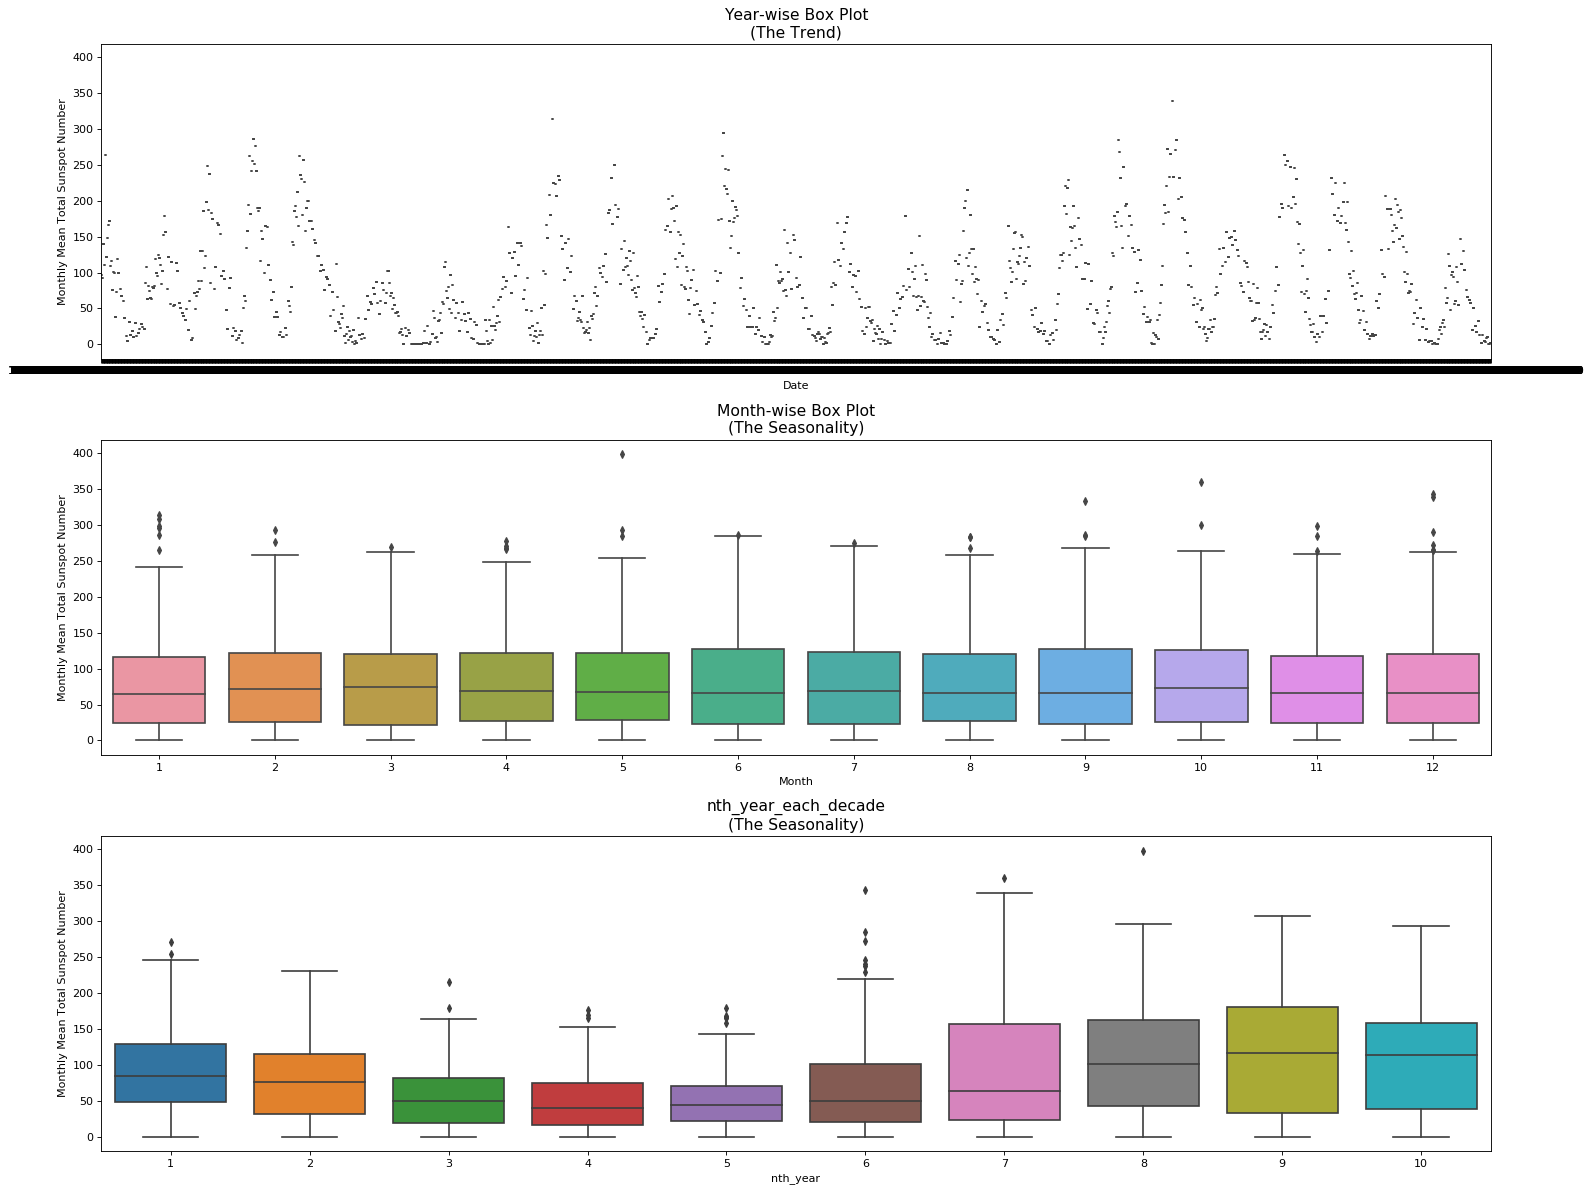

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(20,15), dpi= 80)
sns.boxplot(x='Date', y='Monthly Mean Total Sunspot Number', data=df_non_index, ax=axes[0])
sns.boxplot(x='Month', y='Monthly Mean Total Sunspot Number', data=df_non_index,ax = axes[1])
sns.boxplot(x='nth_year', y='Monthly Mean Total Sunspot Number', data=df_non_index,ax = axes[2])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=14); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=14)
axes[2].set_title('nth_year_each_decade\n(The Seasonality)', fontsize=14)
fig.tight_layout()
plt.show()

In [15]:
df = df.set_index('Date')
df.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


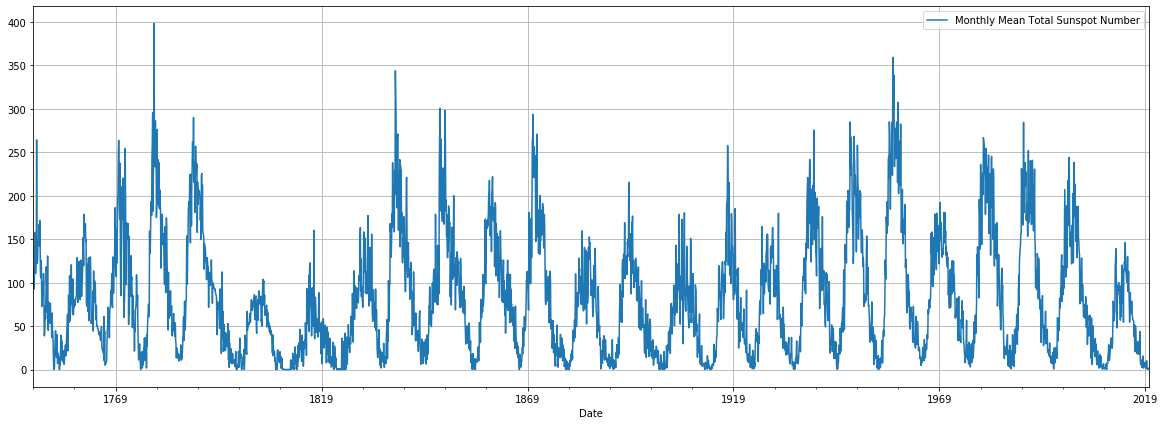

In [16]:
df.plot(grid=True)

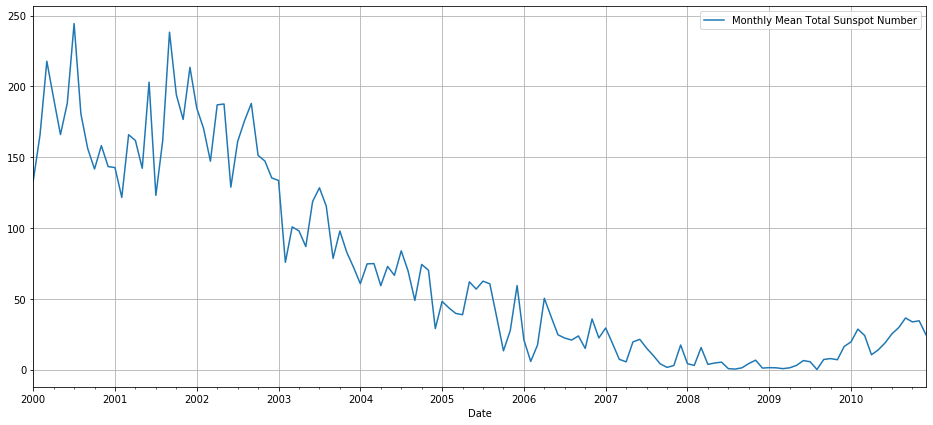

In [17]:
df_2018=df.loc['2000':'2010']
df_2018.plot(figsize=(16,7),grid=True)

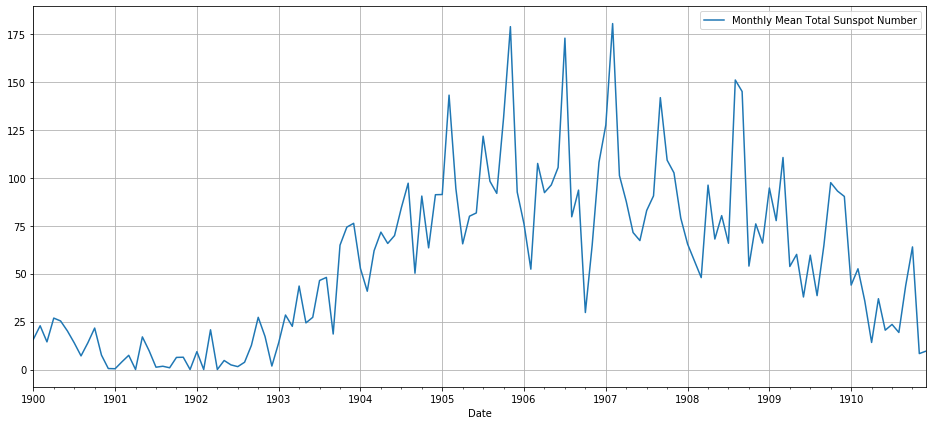

In [19]:
df_2018=df.loc['1900':'1910']
df_2018.plot(figsize=(16,7),grid=True)
plt.show()

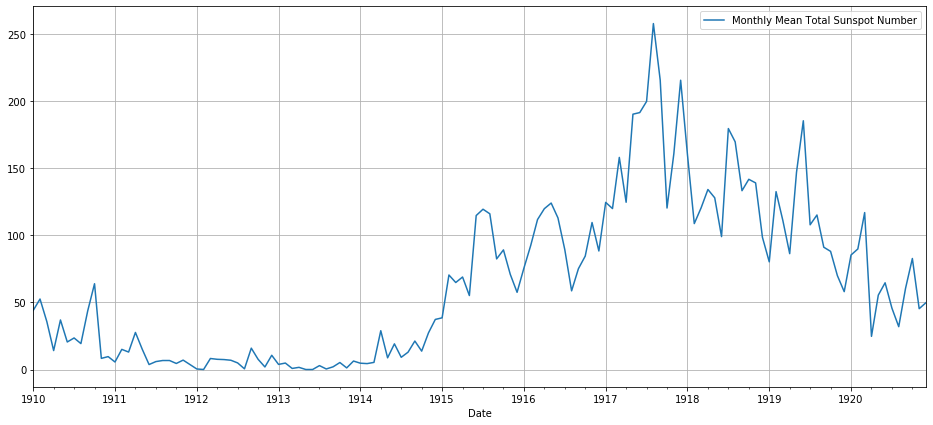

In [20]:
df_191020=df.loc['1910':'1920']
df_191020.plot(figsize=(16,7),grid=True)
plt.show()

In [21]:
df_non_index.head()

,Date,Monthly Mean Total Sunspot Number,Month,nth_year
0,1749-01-31,96.7,1,9
1,1749-02-28,104.3,2,9
2,1749-03-31,116.7,3,9
3,1749-04-30,92.8,4,9
4,1749-05-31,141.7,5,9


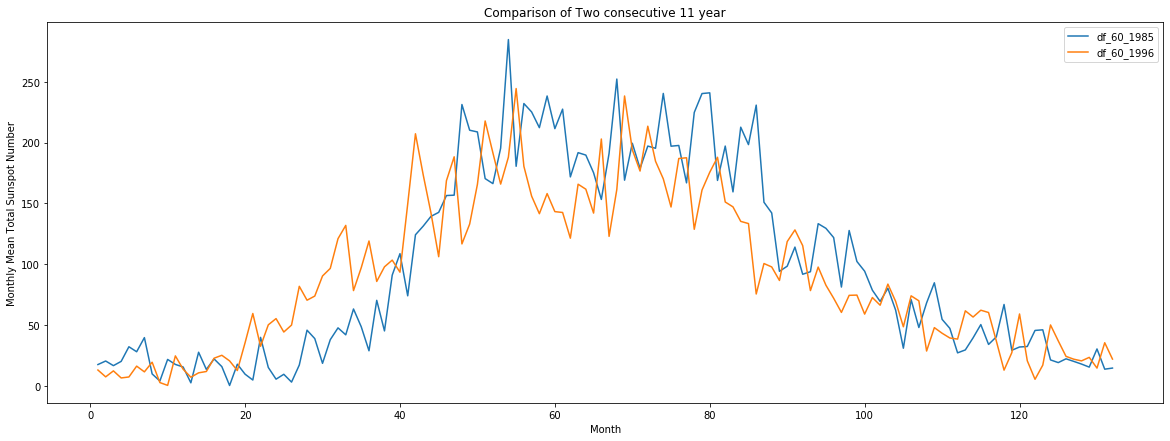

In [22]:
df_11_1985=df_non_index[(df_non_index.Date.dt.year>=1985) & (df_non_index.Date.dt.year<=1995)]
df_11_1996=df_non_index[(df_non_index.Date.dt.year>=1996) &(df_non_index.Date.dt.year<=2006)]

x=np.arange(1,len(df_11_1996['Date'])+1)

plt.plot(x, df_11_1985['Monthly Mean Total Sunspot Number'],label='df_60_1985')
plt.plot(x, df_11_1996['Monthly Mean Total Sunspot Number'],label='df_60_1996')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.title('Comparison of Two consecutive 11 year')
plt.show()

## Lag plot

* It helps to understand the autocorrelation lag, visualizing for few, normally lag greater than 4 is not useful.
* As we increase the lag time, the correlation is decresing.
* The data is correlated with its recet time lag upt 4/5 time lag.

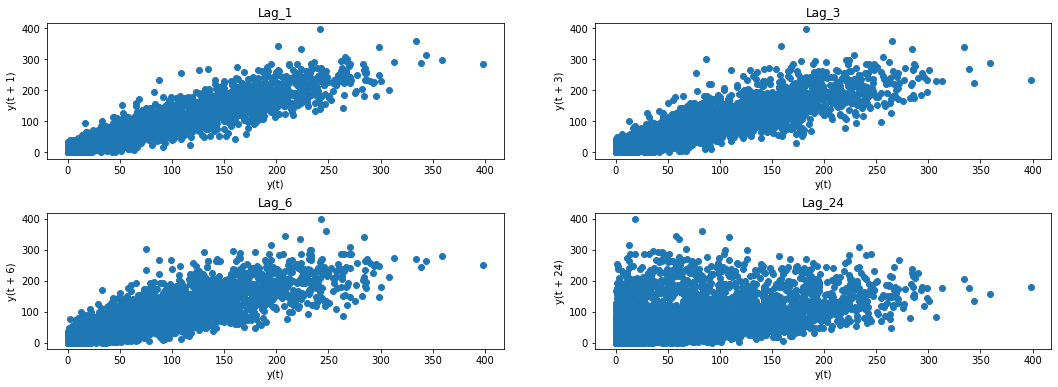

In [23]:
fig=plt.figure(figsize=(18,6))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
ax1=fig.add_subplot(2,2,1)
pd.plotting.lag_plot(df['Monthly Mean Total Sunspot Number'],lag=1)
plt.title('Lag_1')
ax2=fig.add_subplot(2,2,2)
pd.plotting.lag_plot(df['Monthly Mean Total Sunspot Number'],lag=3)
plt.title('Lag_3')
ax3=fig.add_subplot(2,2,3)
pd.plotting.lag_plot(df['Monthly Mean Total Sunspot Number'],lag=6)
plt.title('Lag_6')
ax3=fig.add_subplot(2,2,4)
pd.plotting.lag_plot(df['Monthly Mean Total Sunspot Number'],lag=24)
plt.title('Lag_24')
plt.show()

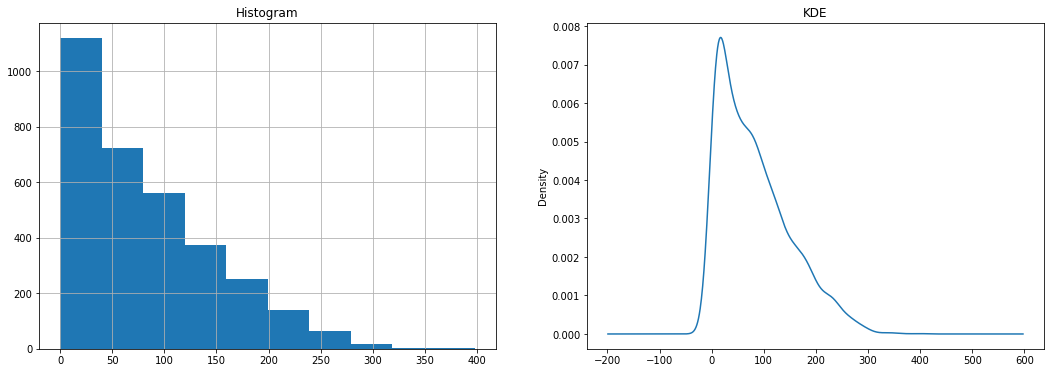

In [24]:
fig=plt.figure(figsize=(18,6))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
ax1=fig.add_subplot(1,2,1)
df['Monthly Mean Total Sunspot Number'].hist()
plt.title('Histogram')
ax2=fig.add_subplot(1,2,2)
df['Monthly Mean Total Sunspot Number'].plot(kind='density')# kernel density plot
plt.title('KDE')
plt.show()

## Testing the Stationarity of data:

* Time series are stationary if `they do not have trend or seasonal effects`. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

* When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
data_series=df['Monthly Mean Total Sunspot Number']
data_series

Date
1749-01-31     96.7
1749-02-28    104.3
1749-03-31    116.7
1749-04-30     92.8
1749-05-31    141.7
              ...  
2019-08-31      0.5
2019-09-30      1.1
2019-10-31      0.4
2019-11-30      0.5
2019-12-31      1.6
Name: Monthly Mean Total Sunspot Number, Length: 3252, dtype: float64

In [27]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(data_series, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.048087e+01
p-value                        1.214714e-18
#Lags Used                     2.800000e+01
Number of Observations Used    3.223000e+03
Critical Value (1%)           -3.432381e+00
Critical Value (5%)           -2.862437e+00
Critical Value (10%)          -2.567248e+00
dtype: float64


In [28]:
if dfoutput['Test Statistic'] < dfoutput['Critical Value (5%)']: 
  print('Series is stationary')
else:
  print('Series is not Stationary')

## OR 

if dfoutput[1] > 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Series is stationary
Series is Stationary


In [29]:
from statsmodels.tsa.stattools import kpss # Kwiatkowski-Phillips-Schmidt-Shin test for stationarity.

In [30]:
stats, p, lags, critical_values = kpss(df['Monthly Mean Total Sunspot Number'], 'c')

C:\Users\Jayanti\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Jayanti\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [31]:
print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'Critial Values: {critical_values}')

if p < 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: 0.1268441554104963
p-value: 0.1
Critial Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is Stationary


* Case 1: Both tests conclude that the series is not stationary -> series is not stationary
* Case 2: Both tests conclude that the series is stationary -> series is stationary
* Case 3: KPSS = stationary and ADF = not stationary  -> trend stationary, remove the trend to make series strict stationary
* Case 4: KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary

## Forecasting:

### Moving Average:
The simple moving average (SMA) calculates an average of the last n values, where Px represents the value in a period, and n represents the number of periods. The average "moves" because you are not using all of the data, only recent periods

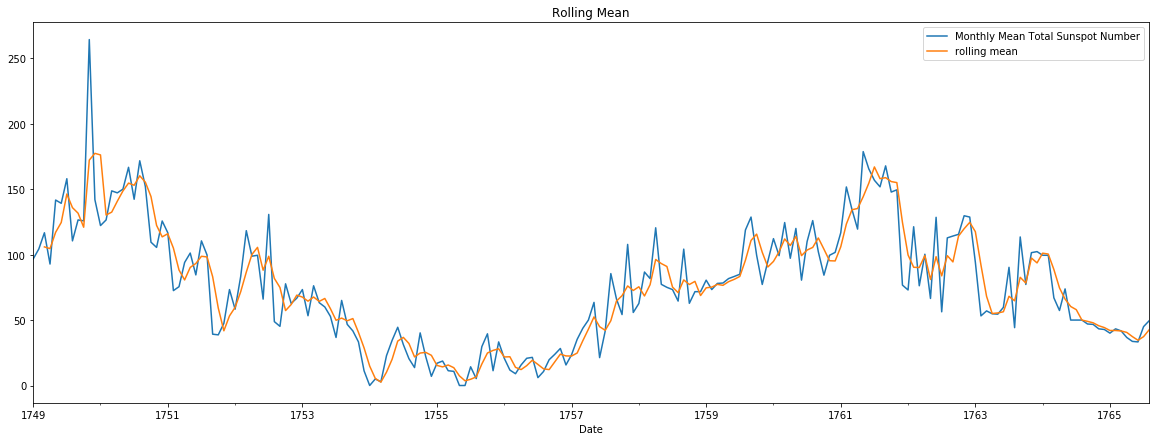

In [32]:
df['Monthly Mean Total Sunspot Number'][:200].plot() 
df['Monthly Mean Total Sunspot Number'][:200].rolling(3).mean().plot(label='rolling mean')

plt.legend()
plt.title('Rolling Mean')

plt.show()

### Weighted Moving Average:
Weighted moving averages assign a heavier weighting to more current data points since they are more relevant than data points in the distant past.

In [33]:
def wma(weights): 
    def calc(x):
        return (weights*x).mean()
    return calc

C:\Users\Jayanti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


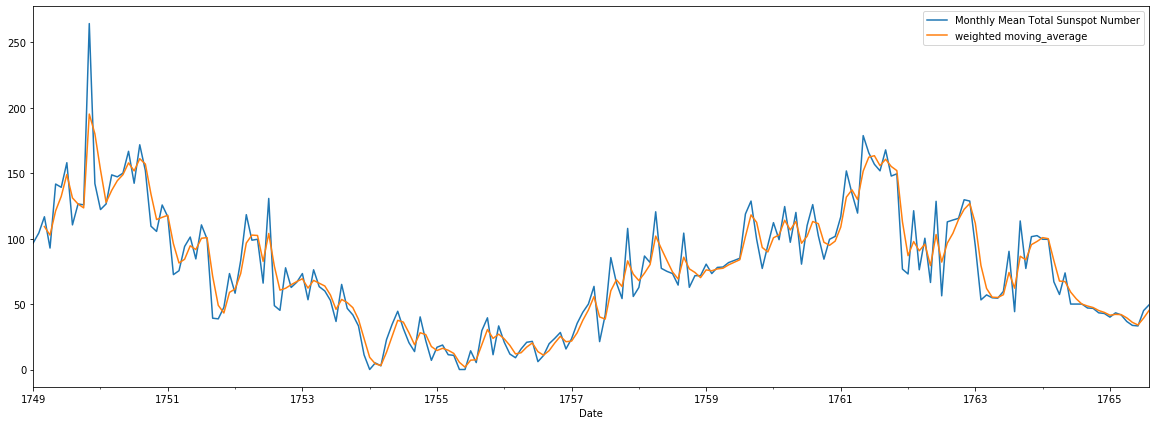

In [34]:
df['Monthly Mean Total Sunspot Number'][:200].plot()
df['Monthly Mean Total Sunspot Number'][:200].rolling(3).apply(wma(np.array([0.5,1,1.5]))).plot(label='weighted moving_average')

plt.legend()
plt.show()

### Exponential Weighted Moving Average:
Exponential moving averages (EMAs) are also weighted toward the most recent prices, but the rate of decrease between one price and its preceding price is not consistent. The difference in the decrease is exponential. 

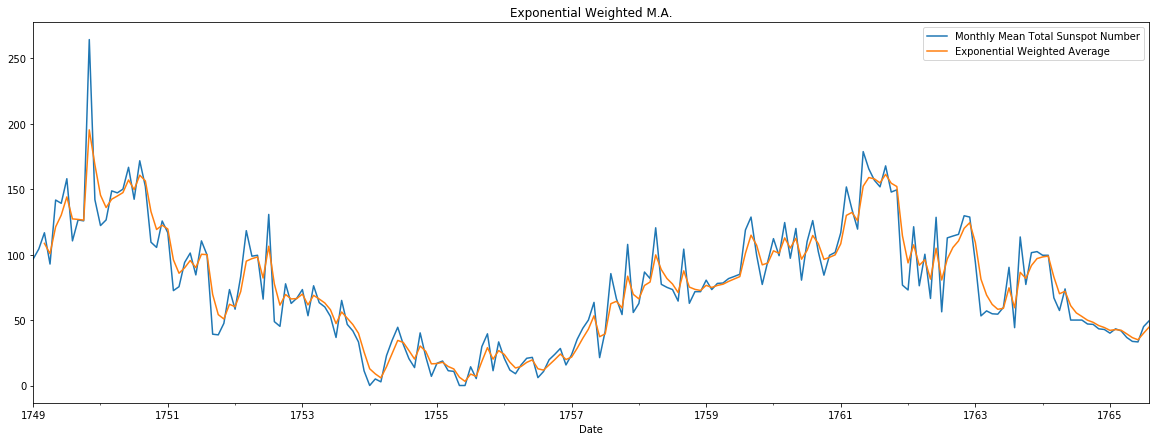

In [35]:
df['Monthly Mean Total Sunspot Number'][:200].plot()
df['Monthly Mean Total Sunspot Number'][:200].ewm(span=3, adjust=False, min_periods=3).mean().plot(label='Exponential Weighted Average')

plt.title('Exponential Weighted M.A.')
plt.legend()
plt.show()

### Exponential Smoothing Moving Average:
Adding a smoothening factor to EWA

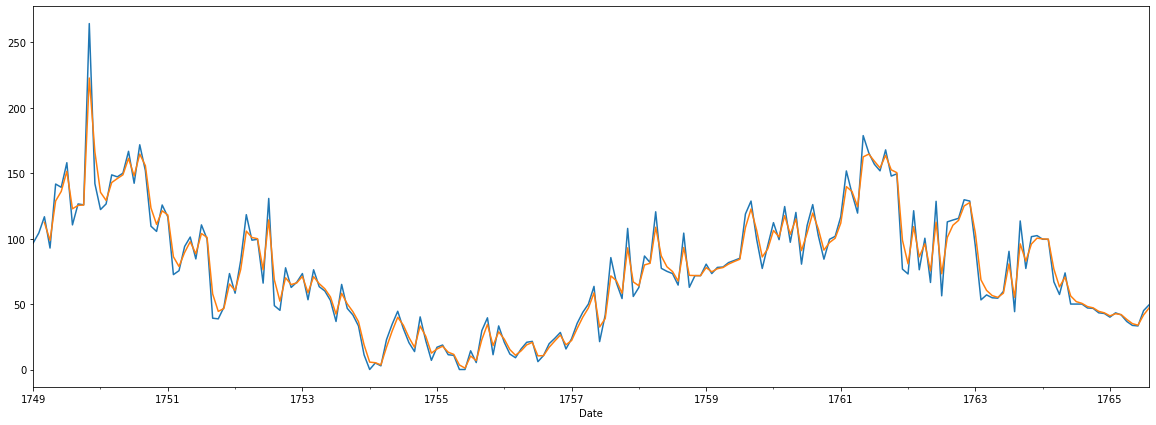

In [36]:
df['Monthly Mean Total Sunspot Number'][:200].plot() # Checking for only first 200 data set
df['Monthly Mean Total Sunspot Number'][:200].ewm(alpha=0.7, adjust=False, min_periods=3).mean().plot(label='Exponential Smooting M A')
plt.show()

C:\Users\Jayanti\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until


            Monthly Mean Total Sunspot Number  Rolling mean       W_M_A  \
Date                                                                      
1749-01-31                               96.7           NaN         NaN   
1749-02-28                              104.3           NaN         NaN   
1749-03-31                              116.7    105.900000  109.233333   
1749-04-30                               92.8    104.600000  102.683333   
1749-05-31                              141.7    117.066667  121.233333   

            E_W_A    E_S_M_A  
Date                          
1749-01-31   96.7        NaN  
1749-02-28  100.5        NaN  
1749-03-31  108.6  112.29600  
1749-04-30  100.7   98.64880  
1749-05-31  121.2  128.78464  


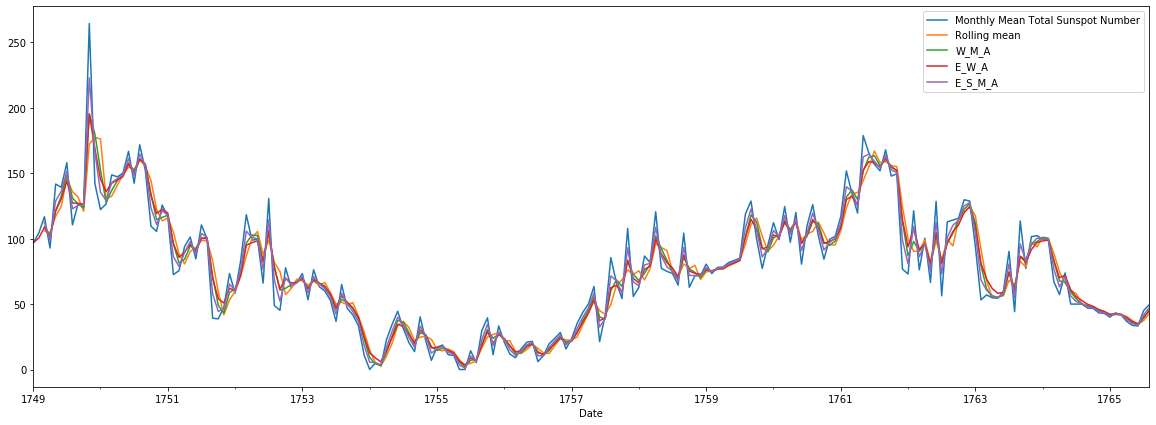

In [37]:
df_with_diff_avg=df[:200].copy()
df_with_diff_avg['Rolling mean']=df['Monthly Mean Total Sunspot Number'][:200].rolling(3).mean()
df_with_diff_avg['W_M_A']= df['Monthly Mean Total Sunspot Number'][:200].rolling(window=3).apply(wma(np.array([0.5,1,1.5])))
df_with_diff_avg['E_W_A']= df['Monthly Mean Total Sunspot Number'][:200].ewm(span=3, adjust=False, min_periods=0).mean()
df_with_diff_avg['E_S_M_A']= df['Monthly Mean Total Sunspot Number'][:200].ewm(alpha=0.7, adjust=False, min_periods=3).mean()
print(df_with_diff_avg.head())

df_with_diff_avg.plot()
plt.show()

In [38]:
df_with_diff_avg.dropna(inplace=True)

In [39]:
df_with_diff_avg.head()

,Monthly Mean Total Sunspot Number,Rolling mean,W_M_A,E_W_A,E_S_M_A
Date,,,,,
1749-03-31,116.7,105.900000,109.233333,108.6,112.296000
1749-04-30,92.8,104.600000,102.683333,100.7,98.648800
1749-05-31,141.7,117.066667,121.233333,121.2,128.784640
1749-06-30,139.2,124.566667,132.300000,130.2,136.075392
1749-07-31,158.0,146.300000,149.016667,144.1,151.422618


In [40]:
def RMSE_CAL(df):
      Rolling_Mean_RMSE=np.sqrt(np.sum((df.iloc[:,0]-df.iloc[:,1])**2))
      W_M_A_RMSE=np.sqrt(np.sum((df.iloc[:,0]-df.iloc[:,2])**2))
      E_W_A_RMSE=np.sqrt(np.sum((df.iloc[:,0]-df.iloc[:,3])**2))
      E_S_M_A_RMSE=np.sqrt(np.sum((df.iloc[:,0]-df.iloc[:,4])**2))
      return {"Rolling_Mean_RMSE":Rolling_Mean_RMSE,"W_M_A_RMSE":W_M_A_RMSE,"E_W_A_RMSE":E_W_A_RMSE,"E_S_M_A_RMSE":E_S_M_A_RMSE}
RMSE_CAL(df_with_diff_avg)

{'Rolling_Mean_RMSE': 234.97585928014917,
 'W_M_A_RMSE': 176.54292285761872,
 'E_W_A_RMSE': 170.051001146579,
 'E_S_M_A_RMSE': 105.42272489998321}

C:\Users\Jayanti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


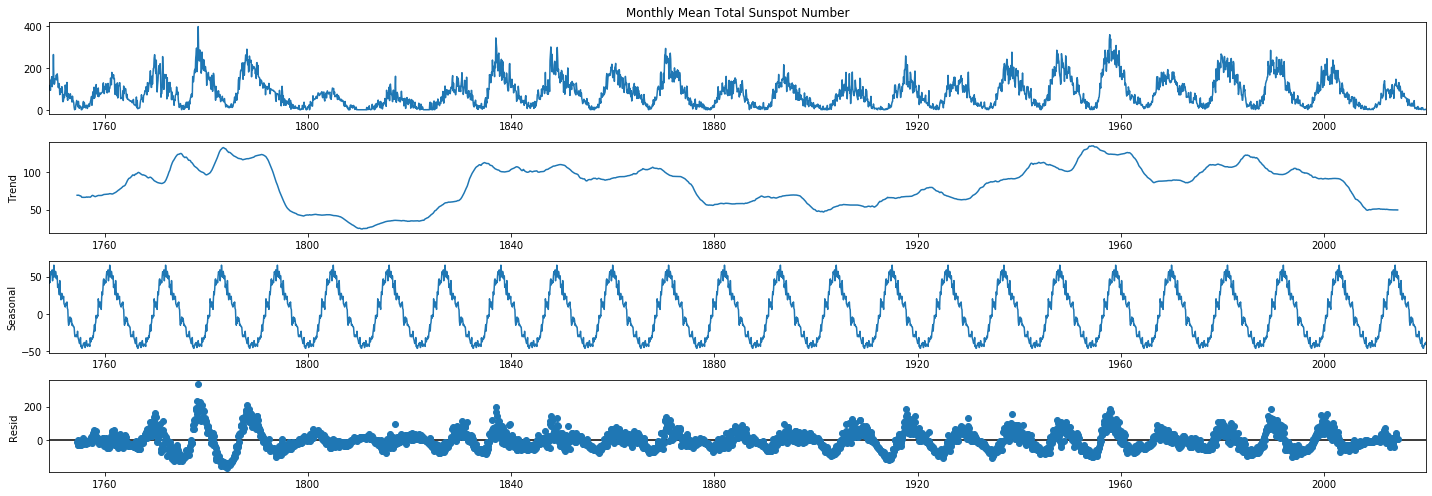

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Monthly Mean Total Sunspot Number'], model="additive",freq=11*12) #Freq is 11 years and 12 months
result.plot()
plt.show()

In [42]:
total_sum=result.trend+result.seasonal+result.resid
total_sum[:100]

Date
1749-01-31     NaN
1749-02-28     NaN
1749-03-31     NaN
1749-04-30     NaN
1749-05-31     NaN
              ... 
1756-12-31    15.7
1757-01-31    23.5
1757-02-28    35.3
1757-03-31    43.7
1757-04-30    50.0
Length: 100, dtype: float64

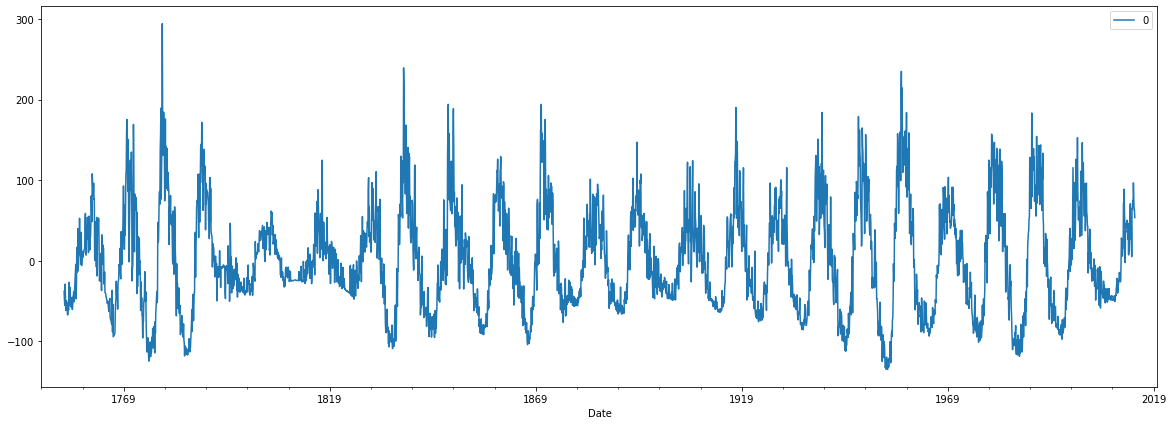

In [43]:
pd.DataFrame(result.observed-result.trend).plot()
plt.show()

In [44]:
df['Monthly Mean Total Sunspot Number'][:100]

Date
1749-01-31     96.7
1749-02-28    104.3
1749-03-31    116.7
1749-04-30     92.8
1749-05-31    141.7
              ...  
1756-12-31     15.7
1757-01-31     23.5
1757-02-28     35.3
1757-03-31     43.7
1757-04-30     50.0
Name: Monthly Mean Total Sunspot Number, Length: 100, dtype: float64

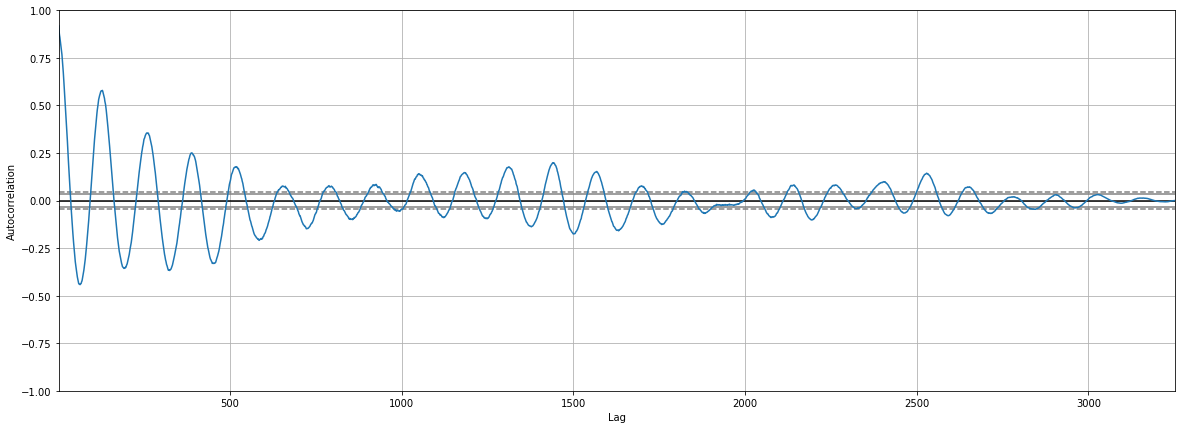

In [45]:
pd.plotting.autocorrelation_plot(df['Monthly Mean Total Sunspot Number']) ## for each month
plt.show()

In [46]:
df['Monthly Mean Total Sunspot Number'].resample("1y").mean()

Date
1749-12-31    134.875000
1750-12-31    139.000000
1751-12-31     79.441667
1752-12-31     79.666667
1753-12-31     51.125000
                 ...    
2015-12-31     69.783333
2016-12-31     39.825000
2017-12-31     21.816667
2018-12-31      7.008333
2019-12-31      3.591667
Freq: A-DEC, Name: Monthly Mean Total Sunspot Number, Length: 271, dtype: float64

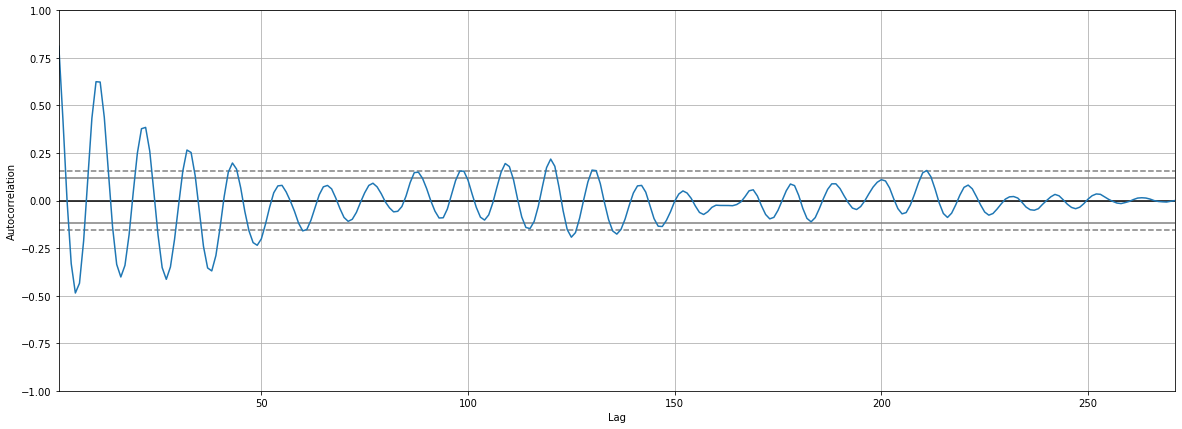

In [47]:
pd.plotting.autocorrelation_plot(df['Monthly Mean Total Sunspot Number'].resample("1y").mean())
plt.show()

In [48]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

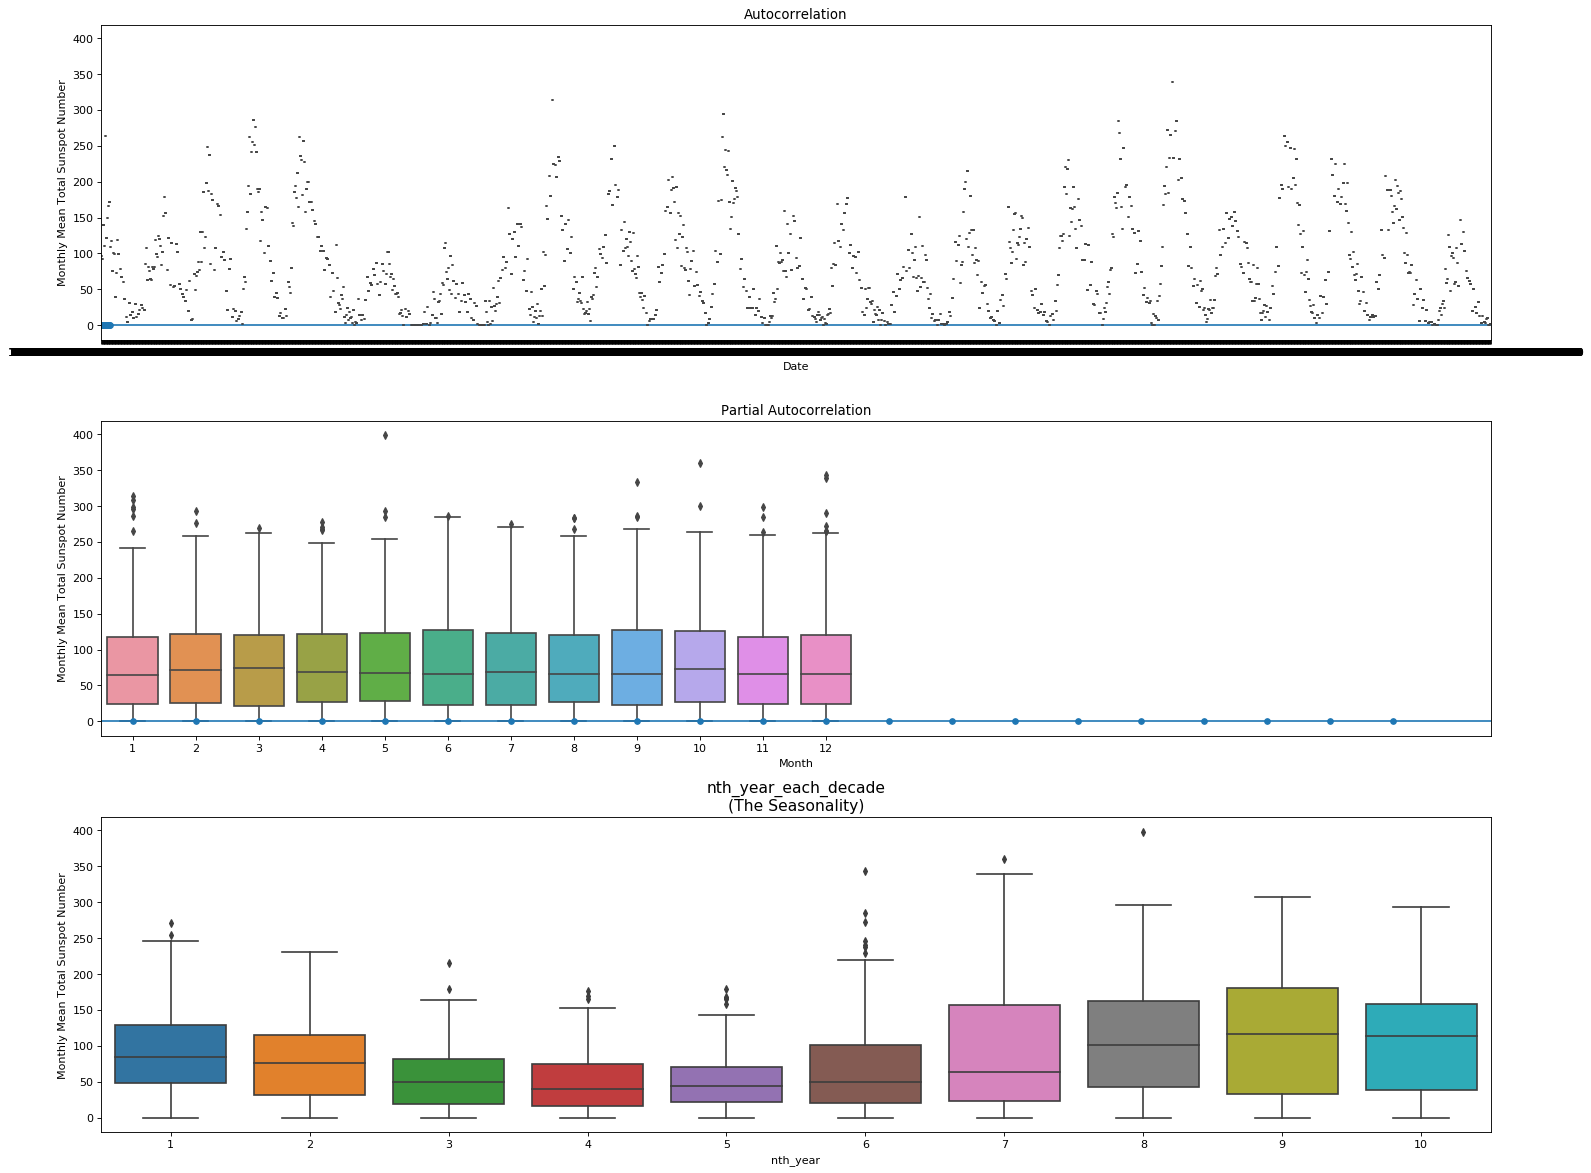

In [49]:
# Draw Plot
plot_acf(df['Monthly Mean Total Sunspot Number'].tolist(), lags=20, ax=axes[0])
plot_pacf(df['Monthly Mean Total Sunspot Number'].tolist(), lags=20, ax=axes[1])

## ARIMA:

ARIMA is an acronym which stands for `Auto Regressive Integrated Moving Average` and is a way of modeling time-series data for forecasting and is specified by three order parameters (p,d,q):
* AR(p): pattern of growth/decline in the data is accounted for (Seasonality)
* I (d): rate of change of the growth/decline is accounted for (Trend)
* MA (q): noise between time points is accounted for (Residual)

Ref: https://people.duke.edu/~rnau/411arim.htm

In [ ]:
#!pip install pmdarima --user

__Reference:__ <br>
http://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html#pmdarima.arima.auto_arima

In [50]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

model = pm.auto_arima(df['Monthly Mean Total Sunspot Number'], 
                        m=11, seasonal=True,
                      start_p=1, start_q=1, max_order=3, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True) 


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[11] intercept   : AIC=30245.684, Time=4.32 sec
 ARIMA(0,0,0)(0,0,0)[11] intercept   : AIC=36662.504, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[11] intercept   : AIC=30651.060, Time=2.16 sec
 ARIMA(0,0,1)(0,0,1)[11] intercept   : AIC=33078.193, Time=2.32 sec
 ARIMA(0,0,0)(0,0,0)[11]             : AIC=39591.690, Time=0.03 sec
 ARIMA(1,0,1)(0,0,1)[11] intercept   : AIC=30243.729, Time=2.26 sec
 ARIMA(1,0,1)(0,0,0)[11] intercept   : AIC=30251.533, Time=0.69 sec
 ARIMA(1,0,1)(0,0,2)[11] intercept   : AIC=30245.680, Time=7.36 sec
 ARIMA(1,0,1)(1,0,0)[11] intercept   : AIC=30243.685, Time=2.56 sec
 ARIMA(1,0,1)(2,0,0)[11] intercept   : AIC=30245.684, Time=11.26 sec
 ARIMA(1,0,1)(2,0,1)[11] intercept   : AIC=30247.684, Time=10.50 sec
 ARIMA(0,0,1)(1,0,0)[11] intercept   : AIC=32588.214, Time=2.71 sec
 ARIMA(2,0,1)(1,0,0)[11] intercept   : AIC=30201.764, Time=4.70 sec
 ARIMA(2,0,1)(0,0,0)[11] intercept   : AIC=30212.148, Time=1.02 sec
 AR

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 3252
Model:             SARIMAX(3, 0, 2)x(0, 0, [1], 11)   Log Likelihood              -15021.286
Date:                              Sun, 13 Jun 2021   AIC                          30058.572
Time:                                      12:48:15   BIC                          30107.268
Sample:                                           0   HQIC                         30076.016
                                             - 3252                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1280      0.023      5.649      0.000       0.084       0.172
ar.L1          2.3076      0.020    114.687      0.000       2.268       2.347
ar.L2         -1.6405      0.040    -40.845      0.000      -1.719      -1.562
ar.L3          0.3313      0.020     16.278      0.000       0.291       0.371
ma.L1         -1.7825      0.013   -132.672      0.000      -1.809      -1.756
ma.L2          0.8039      0.014     59.359      0.000       0.777       0.830
ma.S.L11       0.0118      0.015      0.800      0.424      -0.017       0.041
sigma2       606.8685      9.858     61.562      0.000     587.548     626.189
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              1547.52
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.55
Prob(H) (two-sided):                  0.22   Kurtosis:                         6.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
df.reset_index(inplace=True)

In [53]:
df.head()

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


In [54]:
train=df[(df.Date.dt.year<1958)]
test=df[(df.Date.dt.year>=1958)]

In [55]:
(df.Date.dt.year>=1958) & (df.Date.dt.year<1968)

0       False
1       False
2       False
3       False
4       False
        ...  
3247    False
3248    False
3249    False
3250    False
3251    False
Name: Date, Length: 3252, dtype: bool

In [56]:
test1=df[(df.Date.dt.year>=1958) & (df.Date.dt.year<1968)]
n=len(test1)

In [57]:
model.fit(train['Monthly Mean Total Sunspot Number'])

ARIMA(order=(3, 0, 2), scoring_args={}, seasonal_order=(0, 0, 1, 11),
      suppress_warnings=True)

In [58]:
forecast=model.predict(n_periods=n, return_conf_int=True)

In [59]:
forecast_df = pd.DataFrame(forecast[0],index = test1.index,columns=['Prediction'])
forecast_df.head()

,Prediction
2508,312.442140
2509,306.491923
2510,303.273303
2511,298.661150
2512,298.061423


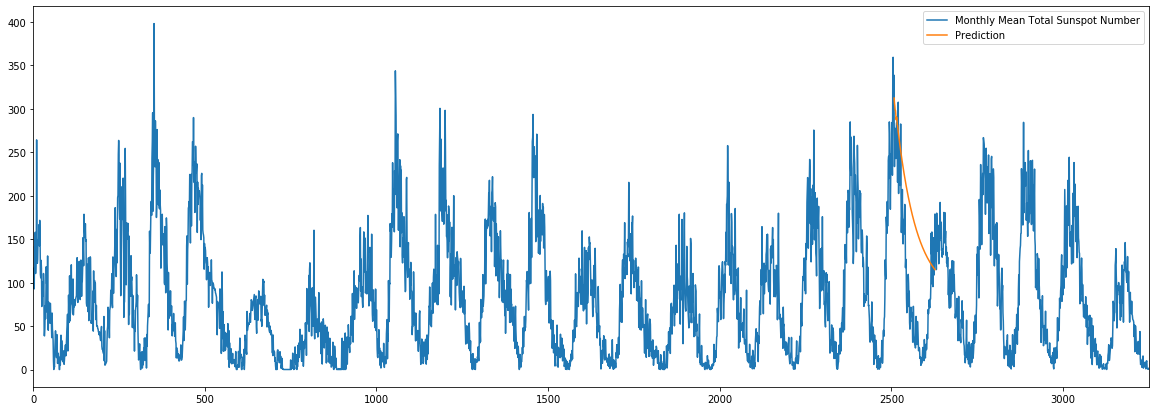

In [60]:
pd.concat([df['Monthly Mean Total Sunspot Number'],forecast_df],axis=1).plot()

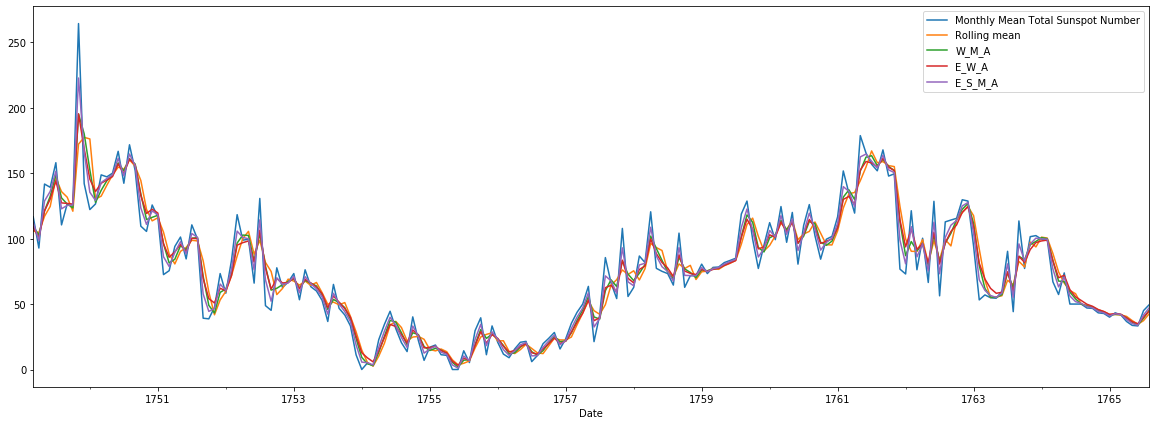

In [62]:
#### Traditional Time Series Forecasting Models:
df_with_diff_avg.plot()
plt.show()